<a href="https://colab.research.google.com/github/Arashlf/UT_ML_Course/blob/main/Homework3/Q4_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML: Homework 3 - Question 4 through 8
## Arash Latifi - 810197576
### Srping 2022

---

Homework3/Q4_8.ipynb

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial import distance
import seaborn as sns

## Q4) KNN

### Theoretical Part:

#### Bias-variance trade of:
In parzen knn, hn is the window size. The smaller the window, the more complex the boundaries will be. Because there may be very few samples in each window, our estimate models have more noise, so there is more variance and less bias. The large hn has enough samples in each window so it has less noise. But a good estimate is not obtained from the model because the complexity is very low, so we have low variance with high bias.

In knn method, kn is the number of samples that are placed in each window. If this value of kn is large, the window will be bigger, so like Parzan method, it can be concluded that with increasing kn, the bias decreases and the variance increases.


#### Parametric and non-Parametric:
In parametric models, it is assumed that the model of probability density functions is known and it is enough to obtain the parameters of that distribution with the data set, and then we no longer need the data set and estimate the probability function obtained for each output data.
In the non-parametric model, we do not have an assumption on the distribution of data or we can not determine a suitable distribution for them, so to estimate each point with all the data in hand, we estimate the output methods. The main problem with this method is that we need all the data to estimate each input and we have to spend a lot of volume to maintain it.

#### Kernel Based methods problem:
The main problem with this method is that we need a lot of data in each window to bring our estimate closer to the actual model, and because each window has to be small, we need a lot of data in total. All this data must be stored. Also, in order to obtain an estimate for each point, the distance of this large number of data from the input point must be measured, thus increasing the volume of calculations. (Problem: collecting, maintaining, processing on a large volume of data)

#### Volume difference in parzen and knn:
In the Parzen method, the volume is denoted by hn, which is the length of the window (hn = Vn), but in the knn method, we increase the volume of each window to such an extent that the data kn is inside it, so the volume of each window is not fixed, unlike the Parzen method and it can be increased or decreased.

### Simulation Part:

### Part a)

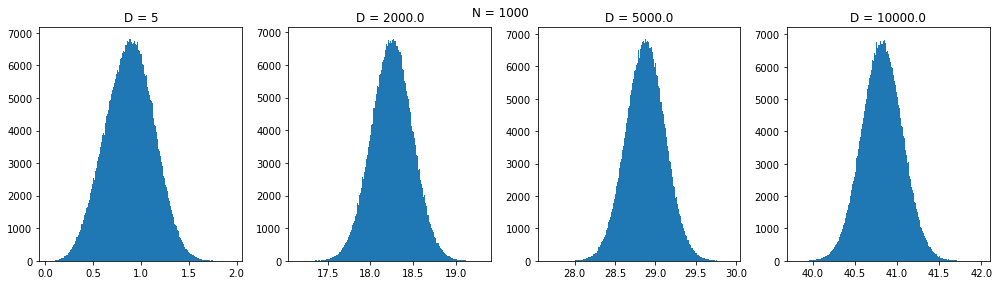

In [24]:
n = 1000
d = [5, 2e3, 5e3 , 1e4]; #, 1e6]

fig, axs = plt.subplots(1, 4, figsize = (14, 4))
fig.suptitle('N = {}'.format(n))
for l in range(4):
  dists = [];
  points = np.random.rand(int(n), int(d[l]))
  for i in range(n):
    for j in range(i+1,n):
      x = distance.euclidean(points[i],points[j])
      dists.append(x)
  axs[l].hist(dists, bins='auto') 
  axs[l].set_title('D = {}'.format(d[l]))
fig.tight_layout()
plt.show()

In a fixed number of samples, if we increase the dimension, the shape of the distribution does not change much and only the scale of distances becomes larger because the squares of the distances add up in each dimension. So this dimension increase does not help us to model more accurately and only makes the calculations more complex and time consuming.

### Part b)

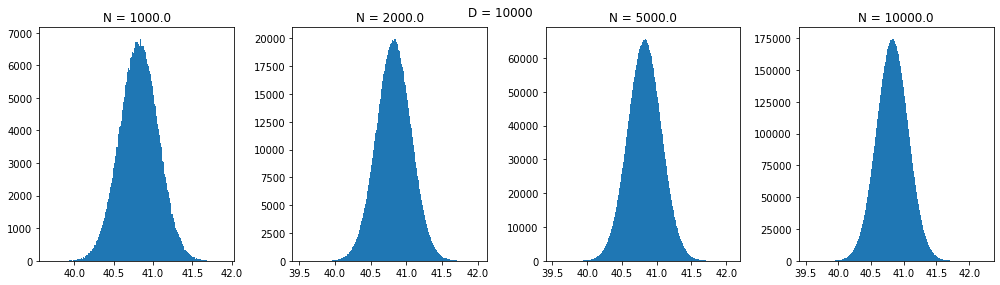

In [26]:
d = 10000
n = [1e3, 2e3, 5e3 , 1e4]; #, 1e6]
dists = [];

fig, axs = plt.subplots(1, 4, figsize = (14, 4))
fig.suptitle('D = {}'.format(d))
for l in range(4):
  points = np.random.rand(int(n[l]), int(d))
  for i in range(int(n[l])):
    for j in range(i+1,int(n[l])):
      x = distance.euclidean(points[i],points[j])
      dists.append(x)
  axs[l].hist(dists, bins='auto') 
  axs[l].set_title('N = {}'.format(n[l]))
fig.tight_layout()
plt.show()

Increasing the number of samples in the same dimension makes the histogram smoother and closer to the original model, which is a Gaussian distribution, but this increase does not change the number of distances. So overall, increasing the number of samples makes the distribution more accurate and smoother, but the volume and time of calculations are greatly increased.

### Part c)

Knn algorithm is a good algorithm if the number of data is enough to have the appropriate amount of data with higher dimension. If the number of data is small, the problem of dimension of curse is created. This is due to the fact that we have increased the dimensions and our input space has been enlarged and many modes have been created, but we do not have enough data to cover this space, so in some cases the probability distribution may be zero and the result with the desired value Have a distance.

## Q5) Non-Parametric Parzen Estimations

### Part a)

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/Arashlf/UT_ML_Course/main/Homework3/ted_main.csv')
data = df['duration']
data.describe()

count    2550.000000
mean      826.510196
std       374.009138
min       135.000000
25%       577.000000
50%       848.000000
75%      1046.750000
max      5256.000000
Name: duration, dtype: float64

In [31]:
def Gaussian_Kernel(x):
    sigma = 1
    mu = 0
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (((x-mu) / sigma)**2))
    

In [33]:
def Estimated_PDf(x, h):
    d = 1
    Vn = h**d
    sum = 0
    for i in range(len(data)):
        sum += Gaussian_Kernel((x - data[i]) / h)
    
    return (1/len(data)) * (1/Vn) * sum

In [34]:
pdf = []
h = 10
step = 5
for x in range(-1000, data.max(), step):
    pdf.append(Estimated_PDf(x, h))

Text(0.5, 1.0, 'PDF for hn = 10')

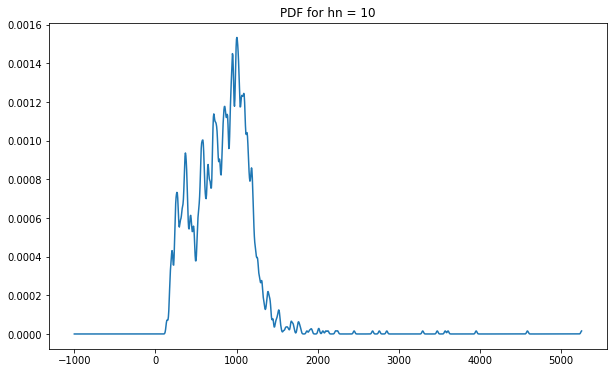

In [38]:
plt.figure(figsize = (10, 6))
plt.plot(range(-1000, data.max(), step), pdf)
plt.title("PDF for hn = 10")

### Part b)

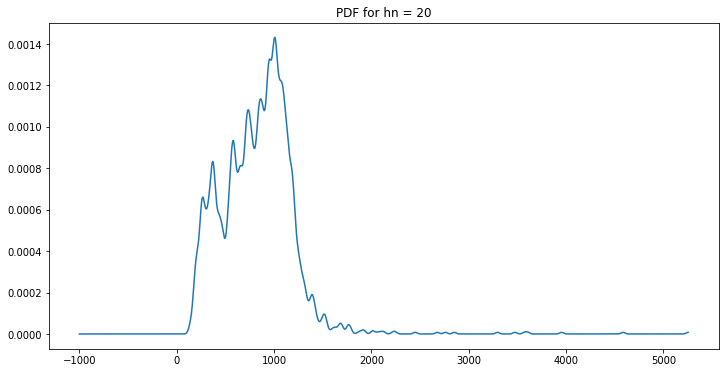

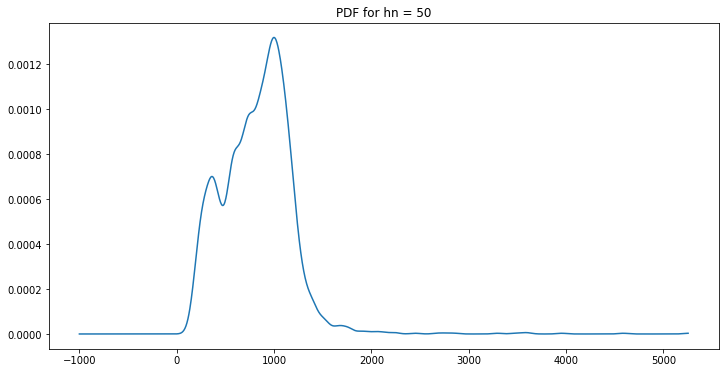

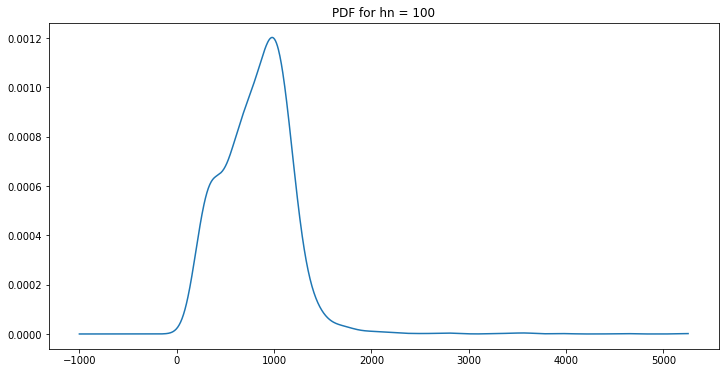

In [39]:
for h in [20, 50, 100]:
    pdf = []
    for x in range(-1000, data.max(), step):
        pdf.append(Estimated_PDf(x, h))
    plt.figure(figsize = (12, 6))
    plt.plot(range(-1000, data.max(), step), pdf)
    plt.title("PDF for hn = " + str(h))

### Part c)

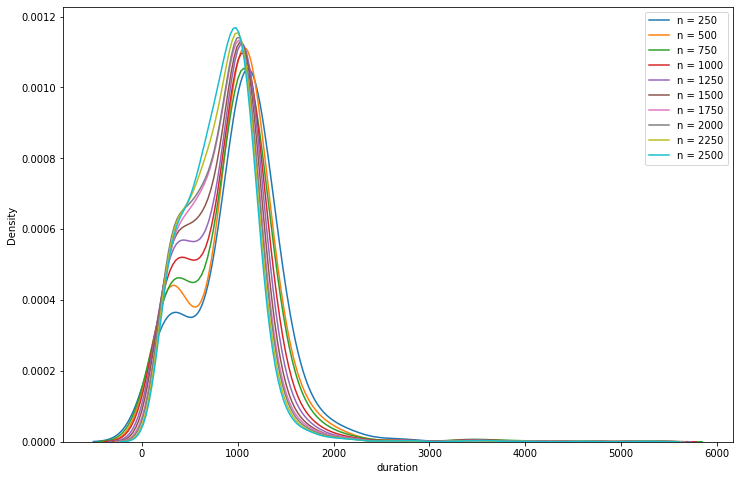

In [43]:
# Using Seaborn Library
plt.figure(figsize=(12 , 8))
i = 0
for n in range(250, len(data) + 1, 250):
   sns.kdeplot(data=data.squeeze()[:n], bw_adjust=1.5, fill=False, label='n = %d'%(n))
   i += 1
plt.legend()
plt.show()

### Part d)

The diagrams obtained in Part B, which are implemented without the library, are similar to the diagrams obtained from the ready library. The only difference is in the computational speed, which the libraries do more quickly. This is because libraries can use the improved Parzen method or more efficient methods to do so, thus reducing their computational volume.

## Q6) 